In [5]:
import pandas as pd
import pandas_profiling
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz

from sklearn.datasets import load_digits


In [6]:
credit = pd.read_csv('/Users/nataliecarreno/Desktop/COURSE2/TASK2/C5.csv') 

In [7]:
credit.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Default
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,0,0,0,1,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,0,2000,1,0,0,0,0,1,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,5000,1,0,0,0,0,1,0
3,50000,1,37,0,0,0,0,0,0,46990,...,1100,1069,1000,1,0,0,0,0,1,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,1,0,0,0,1,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   MARRIAGE                   30000 non-null  int64
 2   AGE                        30000 non-null  int64
 3   PAY_0                      30000 non-null  int64
 4   PAY_2                      30000 non-null  int64
 5   PAY_3                      30000 non-null  int64
 6   PAY_4                      30000 non-null  int64
 7   PAY_5                      30000 non-null  int64
 8   PAY_6                      30000 non-null  int64
 9   BILL_AMT1                  30000 non-null  int64
 10  BILL_AMT2                  30000 non-null  int64
 11  BILL_AMT3                  30000 non-null  int64
 12  BILL_AMT4                  30000 non-null  int64
 13  BILL_AMT5                  30000 non-null  int64
 14  BILL_AMT6             

In [47]:
credit.rename(columns = {"PAY_0":"RPYMT SEP", "PAY_2":"RPYMT AUG", "PAY_3":"RPYMT JUL", "PAY_4":"RPYMT JUN", "PAY_5":"RPYMT MAY", "PAY_6":"RPYMT APR"}, inplace = True)



In [48]:
credit.rename(columns = {"BILL_AMT1":"BILL AMT SEP", "BILL_AMT2":"BILL AMT AUG", "BILL_AMT3":"BILL AMT JUL", "BILL_AMT4":"BILL AMT JUN", "BILL_AMT5":"BILL AMT MAY", "BILL_AMT6":"BILL AMT APR"}, inplace = True)


In [49]:
credit.rename(columns = {"PAY_AMT1":"PAY AMT SEP", "PAY_AMT2":"PAY AMT AUG", "PAY_AMT3":"PAY AMT JUL", "PAY_AMT4":"PAY AMT JUN", "PAY_AMT5":"PAY AMT MAY", "PAY_AMT6":"PAY AMT APR"}, inplace = True)


In [50]:
columns = credit.dtypes.index
print(columns)

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'RPYMT SEP', 'RPYMT AUG', 'RPYMT JUL',
       'RPYMT JUN', 'RPYMT MAY', 'RPYMT APR', 'BILL AMT SEP', 'BILL AMT AUG',
       'BILL AMT JUL', 'BILL AMT JUN', 'BILL AMT MAY', 'BILL AMT APR',
       'PAY AMT SEP', 'PAY AMT AUG', 'PAY AMT JUL', 'PAY AMT JUN',
       'PAY AMT MAY', 'PAY AMT APR', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'Default'],
      dtype='object')


In [51]:
corrMat = credit.corr()
print(corrMat)

                           LIMIT_BAL  MARRIAGE       AGE  RPYMT SEP  \
LIMIT_BAL                   1.000000 -0.108139  0.144713  -0.271214   
MARRIAGE                   -0.108139  1.000000 -0.414170   0.019917   
AGE                         0.144713 -0.414170  1.000000  -0.039447   
RPYMT SEP                  -0.271214  0.019917 -0.039447   1.000000   
RPYMT AUG                  -0.296382  0.024199 -0.050148   0.672164   
RPYMT JUL                  -0.286123  0.032688 -0.053048   0.574245   
RPYMT JUN                  -0.267460  0.033122 -0.049722   0.538841   
RPYMT MAY                  -0.249411  0.035629 -0.053826   0.509426   
RPYMT APR                  -0.235195  0.034345 -0.048773   0.474553   
BILL AMT SEP                0.285430 -0.023472  0.056239   0.187068   
BILL AMT AUG                0.278314 -0.021602  0.054283   0.189859   
BILL AMT JUL                0.283236 -0.024909  0.053710   0.179785   
BILL AMT JUN                0.293988 -0.023344  0.051353   0.179125   
BILL A

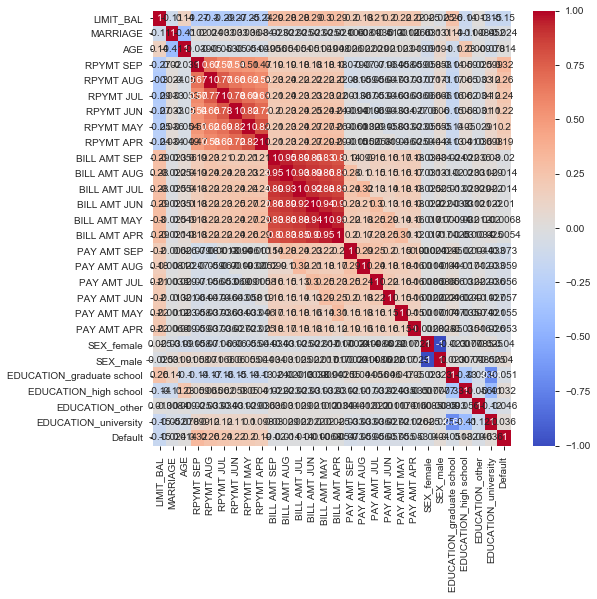

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(credit.corr(), annot=True, cmap="coolwarm")

In [10]:
covMat = credit.cov()
print(covMat)

                              LIMIT_BAL     MARRIAGE            AGE  \
LIMIT_BAL                  1.683446e+10 -7323.669658  173076.722569   
MARRIAGE                  -7.323670e+03     0.272452      -1.992764   
AGE                        1.730767e+05    -1.992764      84.969755   
RPYMT SEP                 -3.954593e+04     0.011683      -0.408639   
RPYMT AUG                 -4.603765e+04     0.015122      -0.553408   
RPYMT JUL                 -4.443225e+04     0.020421      -0.585263   
RPYMT JUN                 -4.057181e+04     0.020213      -0.535851   
RPYMT MAY                 -3.667056e+04     0.021074      -0.562245   
RPYMT APR                 -3.509308e+04     0.020616      -0.517022   
BILL AMT SEP               2.727020e+09  -902.154685   38172.933546   
BILL AMT AUG               2.570130e+09  -802.517866   35613.657962   
BILL AMT JUL               2.548533e+09  -901.679085   34334.251320   
BILL AMT JUN               2.453926e+09  -783.881599   30453.108180   
BILL A

In [35]:
X = credit.iloc[:,2:28]
print('Feature Sample')
X.head()

Feature Sample


,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Default
0,24,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,0,1,0,0,0,0,1,1
1,26,-1,2,0,0,0,2,2682,1725,2682,...,1000,0,2000,1,0,0,0,0,1,1
2,34,0,0,0,0,0,0,29239,14027,13559,...,1000,1000,5000,1,0,0,0,0,1,0
3,37,0,0,0,0,0,0,46990,48233,49291,...,1100,1069,1000,1,0,0,0,0,1,0
4,57,-1,0,-1,0,0,0,8617,5670,35835,...,9000,689,679,0,1,0,0,0,1,0


In [36]:
y = credit['LIMIT_BAL']
print('Dependent Variable')
y.head()

Dependent Variable


0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [37]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [38]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [39]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46659600430516096
Linear Regression 0.35317484839717994
Support Vector Regression -0.05037380240603747


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [41]:
algo = RandomForestRegressor()

RFfit = algo.fit(X_train,y_train)

In [42]:
predictions = RFfit.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.470
RMSE: 93674.971


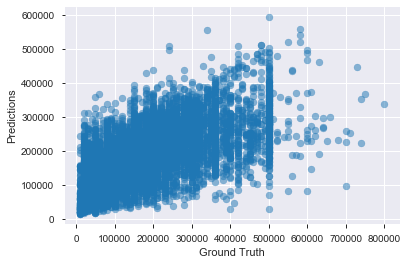

In [80]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [43]:
algo1 = LinearRegression()
RFfit1 = algo1.fit(X_train,y_train)

In [83]:
predictions1 = RFfit1.predict(X_test)
predRsquared = r2_score(y_test,predictions1)
rmse = sqrt(mean_squared_error(y_test, predictions1))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.357
RMSE: 103173.845


In [84]:
algo2 = SVR()
RFfit2 = algo2.fit(X_train,y_train)

In [85]:
predictions2 = RFfit2.predict(X_test)
predRsquared = r2_score(y_test,predictions2)
rmse = sqrt(mean_squared_error(y_test, predictions2))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.037
RMSE: 131044.967


In [74]:
print(cross_val_score(model, X, y, cv=3)) 

[-0.03367845 -0.00461573 -0.11282723]


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [8]:
X1 = credit.drop('Default', axis=1)
y1 = credit['Default']

In [9]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [11]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X1,y1, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [12]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8152666666666666
Decision Tree Classifier 0.7248999999999999
Gradient Boosting Classifier 0.8202333333333334


In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .30, random_state = 123)

In [14]:
algo2 = RandomForestClassifier()
modelrfc2 = algo2.fit(X1_train,y1_train)

In [16]:
preds2 = modelrfc2.predict(X1_test)

#Print full report
print('Classification Accuracy Report')
print(classification_report(y1_test, preds2))

Classification Accuracy Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7052
           1       0.62      0.38      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.73      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [18]:
algo3 = DecisionTreeClassifier()
modelrfc3 = algo3.fit(X1_train,y1_train)

In [19]:
preds3 = modelrfc3.predict(X1_test)

#Print full report
print('Classification Accuracy Report')
print(classification_report(y1_test, preds3))

Classification Accuracy Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      7052
           1       0.39      0.43      0.41      1948

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.62      9000
weighted avg       0.74      0.73      0.73      9000



In [20]:
algo4 = GradientBoostingClassifier()
modelrfc4 = algo4.fit(X1_train,y1_train)

In [45]:
preds4 = modelrfc4.predict(X1_test)

#Print full report
print('Gradient Boosting Classifier Accuracy Report')
print(classification_report(y1_test, preds4))

Gradient Boosting Classifier Accuracy Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7052
           1       0.65      0.38      0.48      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

